# Data visualization



In [1]:
import os
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from scipy import stats

data_dir = 'CE'

# this is to silence pandas' warnings
import warnings
warnings.simplefilter(action='ignore')
    
%matplotlib inline

In [2]:
def assign_elevation_level(x):
    """
    Assigns elevation profile based on 
    elevation in meters above sea level.
    """
    if x <= 500: 
        return 'low'
    elif 500 < x <= 1500:
        return 'medium'
    else:
        return 'high'

In [3]:
import pandas as pd
 
# Data.tsv is stored locally in the
# same directory as of this python file
df_metadata = pd.read_csv('food-metadata.tsv',sep = '\t')
display(df_metadata)

,sample-id,rindtype,style,name,continent,country,region,longitude,latitude,ph,salt,moisture,animal_source,pasteurized
0,#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,categorical,categorical,categorical,categorical,categorical
1,11488.CSB279,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.95,0.044293775,33.33333333,cow,N
2,11488.CSB280,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.045997737,34.80519481,cow,N
3,11488.CSB281,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.54,0.068926154,31.33333333,cow,N
4,11488.CSB282,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.030862483,34.90566038,cow,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,11488.CSB980,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.02,0.134996023,28.20512821,cow,Y
351,11488.CSB981,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.09,0.102762839,25.76153177,cow,Y
352,11488.CSB984,natural,clothbound,Bandaged_Cheddar,North_America,USA,Wisconsin,-90.23096,42.573335,7.41,0.285081837,28.84012539,cow,Y
353,11488.CSB985,washed,alpine,Alpine_Renegade,North_America,USA,Wisconsin,-89.832345,43.017497,7.06,0.109716632,24.9661705,cow,N


In [4]:
# make sample-id to index and delete the numbers
df_metadata.set_index('sample-id', inplace = True)
display (df_metadata)

,rindtype,style,name,continent,country,region,longitude,latitude,ph,salt,moisture,animal_source,pasteurized
sample-id,,,,,,,,,,,,,
#q2:types,categorical,categorical,categorical,categorical,categorical,categorical,numeric,numeric,categorical,categorical,categorical,categorical,categorical
11488.CSB279,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.95,0.044293775,33.33333333,cow,N
11488.CSB280,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.045997737,34.80519481,cow,N
11488.CSB281,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.54,0.068926154,31.33333333,cow,N
11488.CSB282,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.030862483,34.90566038,cow,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488.CSB980,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.02,0.134996023,28.20512821,cow,Y
11488.CSB981,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.09,0.102762839,25.76153177,cow,Y
11488.CSB984,natural,clothbound,Bandaged_Cheddar,North_America,USA,Wisconsin,-90.23096,42.573335,7.41,0.285081837,28.84012539,cow,Y


In [5]:
df_metadata = df_metadata.drop(index='#q2:types')
df_metadata

,rindtype,style,name,continent,country,region,longitude,latitude,ph,salt,moisture,animal_source,pasteurized
sample-id,,,,,,,,,,,,,
11488.CSB279,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.95,0.044293775,33.33333333,cow,N
11488.CSB280,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.045997737,34.80519481,cow,N
11488.CSB281,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.54,0.068926154,31.33333333,cow,N
11488.CSB282,natural,NaN,Bethlehem,North_America,USA,Connecticut,-73.210236,41.611893,6.55,0.030862483,34.90566038,cow,N
11488.CSB290,washed,alpine,Pleasant_Ridge_Reserve,North_America,USA,Wisconsin,-90.136253,43.054545,6.29,0.220927133,18.88111888,cow,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11488.CSB980,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.02,0.134996023,28.20512821,cow,Y
11488.CSB981,natural,blue,Dunbarton_Blue,North_America,USA,Wisconsin,-90.23096,42.573335,7.09,0.102762839,25.76153177,cow,Y
11488.CSB984,natural,clothbound,Bandaged_Cheddar,North_America,USA,Wisconsin,-90.23096,42.573335,7.41,0.285081837,28.84012539,cow,Y


AttributeError: 'DataFrame' object has no attribute 'choice'

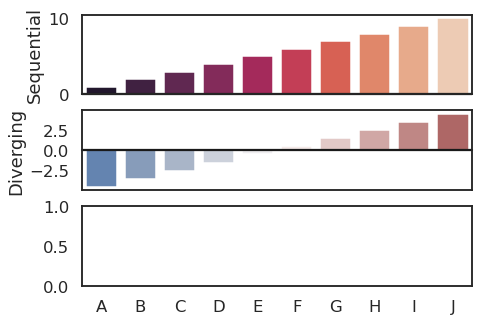

In [19]:

sns.set_theme(style="white", context="talk")
rs = df_metadata

# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

# Generate some sequential data
x = np.array(list("ABCDEFGHIJ"))
y1 = np.arange(1, 11)
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

# Center the data to make it diverging
y2 = y1 - 5.5
sns.barplot(x=x, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

# Randomly reorder the data to make it qualitative
y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=x, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

# Finalize the plot
sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)